# 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/GOOG.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']
df.info()
ts
df.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-12-15 to 2022-12-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


DatetimeIndex(['2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-27',
               '2021-12-28', '2021-12-29',
               ...
               '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09', '2022-12-12', '2022-12-13',
               '2022-12-14', '2022-12-15'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

# 데이터 전처리

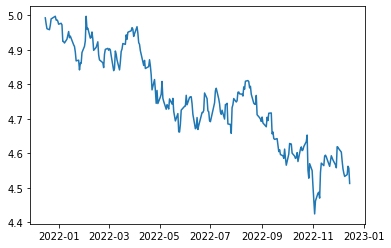

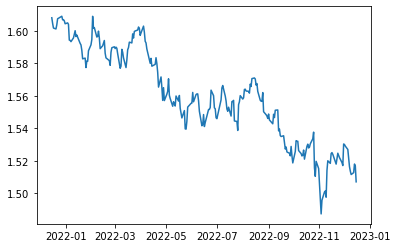

In [4]:
ts[ts.isnull()]
plt.plot(ts)
plt.show()

ts = np.log(ts)
plt.plot(ts)
plt.show()

# Stationay Data 검증

In [5]:
#한글폰트 추가
plt.rc('font',family='NanumGothic')

# 정성적 분석

In [6]:
def plot_rolling_test(ts, window):
    rolling_mean = ts.rolling(window=window).mean()
    rolling_std = ts.rolling(window=window).std()
    
    plt.plot(ts, color="blue", label="주가")
    plt.plot(rolling_mean, color="red", label="{}합의 평균".format(window))
    #plt.plot(rolling_std, color="green", label="{}합의 표준편차".format(window))
    plt.legend(loc="best")
    plt.title("{}일치 합의 평균/편차 그래프".format(window))
    plt.show()

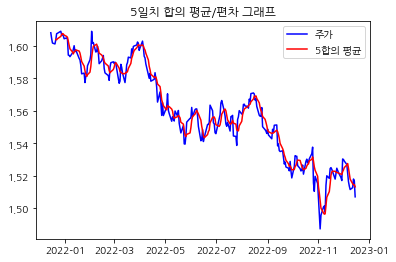

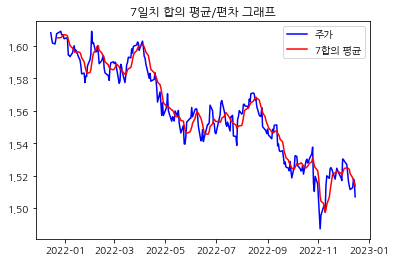

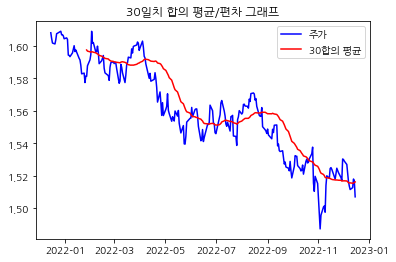

In [7]:
plot_rolling_test(ts, 5)
plot_rolling_test(ts, 7)
plot_rolling_test(ts, 30)

# 정량적 분석

In [8]:
def station_test(ts):
    test_set = adfuller(ts, autolag="AIC")
    print(test_set)
    print()
    print("=====================================")
    print("Test Staticd = {}".format(test_set[0]))
    print("p_value = {}".format(test_set[1]))
    print("Lags Used = {}".format(test_set[2]))
    print("Number of Obsevations Used : {}".format(test_set[3]))
    print("=====================================")

In [10]:
station_test(ts)

(-1.314995300632506, 0.6222843285794958, 0, 252, {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}, -1805.4340705708428)

Test Staticd = -1.314995300632506
p_value = 0.6222843285794958
Lags Used = 0
Number of Obsevations Used : 252


# 시계열 분석

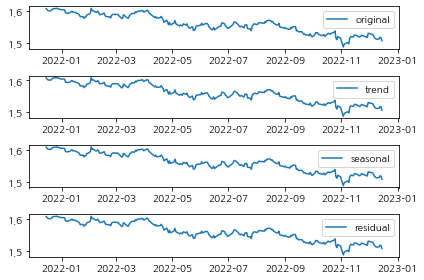

In [11]:
decomposit = seasonal_decompose(ts, period=10)

trend = decomposit.trend
seasonal = decomposit.seasonal
residual = decomposit.resid

lt = ["original", "trend", "seasonal", "residual"]
for i in range(411, 415):
    plt.subplot(i)
    plt.plot(ts, label="{}".format(lt[i-411]))
    plt.legend(loc="best")
    plt.tight_layout()
plt.show()

# Residual stationay 검정


In [12]:
residual.dropna(inplace=True)
station_test(residual)

(-6.9085665049084115, 1.229086537740692e-09, 13, 229, {'1%': -3.4592326027153493, '5%': -2.8742454699025872, '10%': -2.5735414688888465}, -1851.8171045001186)

Test Staticd = -6.9085665049084115
p_value = 1.229086537740692e-09
Lags Used = 13
Number of Obsevations Used : 229


# ARIMA 파라미터 설정

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


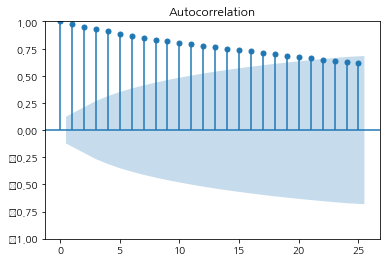

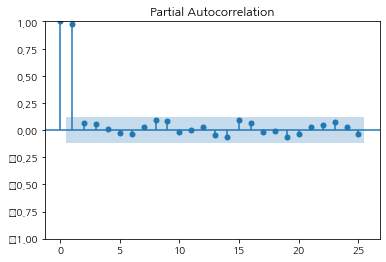

In [13]:
#p와 q 선정 (p >= 1, q = ?)
plot_acf(ts)
plot_pacf(ts)
plt.show()

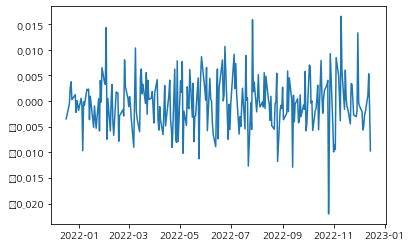

(-16.107752789436876, 5.051387343027339e-29, 0, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, -1795.7641418496733)

Test Staticd = -16.107752789436876
p_value = 5.051387343027339e-29
Lags Used = 0
Number of Obsevations Used : 251


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


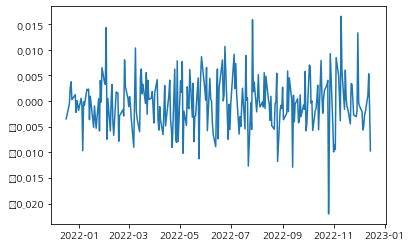

(-8.497083719533242, 1.2673246691525266e-13, 11, 239, {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}, -1753.9948410245147)

Test Staticd = -8.497083719533242
p_value = 1.2673246691525266e-13
Lags Used = 11
Number of Obsevations Used : 239


In [14]:
#d선정 (d = 1)
diff1 = ts.diff(periods=1).iloc[1:]
plt.plot(diff1)
plt.show()
station_test(diff1)

diff2 = diff1.diff(periods=1).iloc[1:]
plt.plot(diff1)
plt.show()
station_test(diff2)

# 데이터셋 분리

In [15]:
print(len(ts))

253


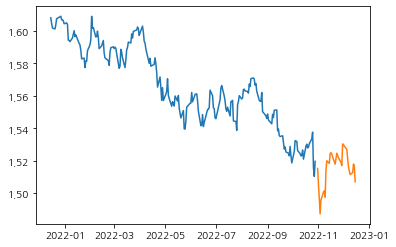

In [16]:
train_size = 220
train = ts[:train_size]
test = ts[train_size:]

plt.plot(train)
plt.plot(test)
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  220
Model:                ARIMA(18, 1, 0)   Log Likelihood                 855.132
Date:                Fri, 16 Dec 2022   AIC                          -1672.263
Time:                        08:16:29   BIC                          -1607.871
Sample:                             0   HQIC                         -1646.257
                                - 220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0629      0.080     -0.788      0.431      -0.219       0.094
ar.L2         -0.0648      0.070     -0.926      0.355      -0.202       0.072
ar.L3         -0.0952      0.073     -1.304      0.1

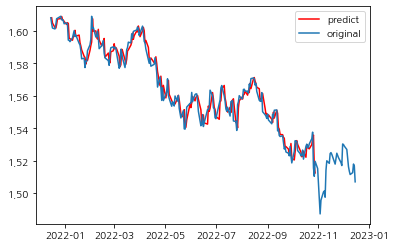

In [17]:
model = ARIMA(train, order=(18, 1, 0))
fitted_model = model.fit()
print(fitted_model.summary())

fitted_model = fitted_model.predict()
fitted_model = fitted_model.drop(fitted_model.index[0])

plt.plot(fitted_model, label='predict', color="red")
plt.plot(ts, label='original')
plt.legend()

# 예측데이터 시각화

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


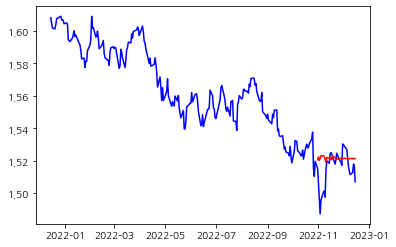

In [18]:
fitted_model = model.fit()
predict = fitted_model.forecast(len(test))
predictions = pd.Series(predict.values, index=test.index)

plt.plot(ts, label="original", color="blue")
plt.plot(predictions, label="prediction", color="red")
plt.show()

# 오차률 검산

In [19]:
mape = np.mean(np.abs(np.exp(predictions) - np.exp(test))/np.abs(np.exp(test)))
print('MAPE: {:.2f}%'.format(mape*100))

MAPE: 0.90%
